In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PATH = Path('data/')
list(PATH.iterdir())

[PosixPath('data/train.tsv'),
 PosixPath('data/test.tsv'),
 PosixPath('data/sample_submission.csv.7z')]

In [3]:
train_df = pd.read_csv(f'{PATH}/train.tsv', sep='\t')
test_df = pd.read_csv(f'{PATH}/test.tsv', sep='\t')

## Data Exploration

In [5]:
train_df.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [8]:
# Missing Values
train_df.isnull().sum()*100/train_df.shape[0]

train_id              0.000000
name                  0.000000
item_condition_id     0.000000
category_name         0.426769
brand_name           42.675687
price                 0.000000
shipping              0.000000
item_description      0.000270
dtype: float64

In [7]:
train_df.select_dtypes(include='object').nunique()

name                1225273
category_name          1287
brand_name             4809
item_description    1281426
dtype: int64

In [10]:
train_df['price'].describe().astype('int')

count    1482535
mean          26
std           38
min            0
25%           10
50%           17
75%           29
max         2009
Name: price, dtype: int64

In [11]:
train_df.query('price==0').shape[0]

874

In [12]:
train_df['price'].quantile(0.99)

170.0

In [13]:
train_df.query('price>170').shape[0]

14741

## Compare price distribution to normal

/Users/santhoshhari/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.01)

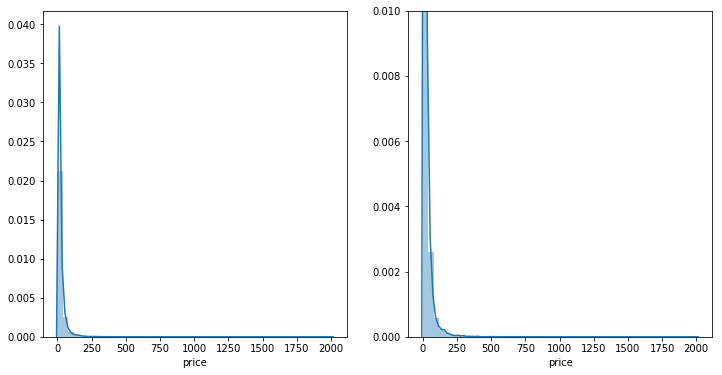

In [9]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))
sns.distplot(train_df['price'], ax=ax1)
sns.distplot(train_df['price'], ax=ax2)
ax2.set_ylim(0, 0.01)

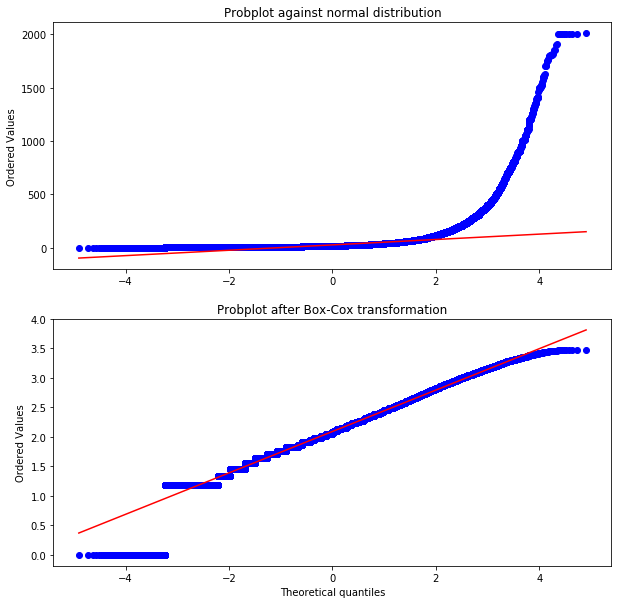

In [14]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
prob = st.probplot(train_df.price.values, dist=st.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
xt, box_cox_lambda = st.boxcox(train_df.price.values+1)
prob = st.probplot(xt, dist=st.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

In [15]:
box_cox_lambda

-0.2435088790022059

In [16]:
train_df.price = np.log1p(train_df.price)

/Users/santhoshhari/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


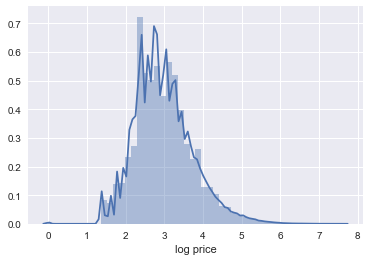

In [17]:
sns.set(color_codes=True)
sns.distplot(train_df['price'],axlabel='log price')
plt.show()